In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
# Load historical precipitation data
history_precipitation = pd.read_csv("corrected lagos_weeather_data_2002_to_2024.csv")

# Strip whitespace from column names if needed
history_precipitation.columns = history_precipitation.columns.str.strip()


# Convert 'date' column to datetime type
history_precipitation['date'] = pd.to_datetime(history_precipitation['date'], errors='coerce', dayfirst=True)

# Remove rows with NaT values if any
history_precipitation = history_precipitation.dropna(subset=['date'])

# Set 'date' column as the index
history_precipitation.set_index('date', inplace=True)


In [5]:
# Remove duplicate index entries
history_precipitation = history_precipitation[~history_precipitation.index.duplicated(keep='first')]

# Ensure data is sorted by index (date)
history_precipitation.sort_index(inplace=True)

# Display first few rows of data to verify
print(history_precipitation.head())

             name  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
date                                                                    
2002-01-01  Lagos     28.6     25.6  27.2          33.8          25.6   
2002-01-02  Lagos     33.1     23.2  26.3          31.1          23.2   
2002-01-03  Lagos     28.1     26.1  27.4          32.8          26.1   
2002-01-04  Lagos     33.1     27.1  28.8          40.7          30.8   
2002-01-05  Lagos     31.1      9.1  24.6          39.3           6.4   

            feelslike   dew  humidity  precip  ...  severerisk  \
date                                           ...               
2002-01-01       30.7  25.2      88.7     0.0  ...         NaN   
2002-01-02       25.8  12.4      45.8     0.0  ...         NaN   
2002-01-03       30.6  24.8      85.4     0.0  ...         NaN   
2002-01-04       34.5  25.8      84.1     0.0  ...         NaN   
2002-01-05       28.8  21.4      83.2     0.0  ...         NaN   

                        s

C:\Users\hp\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


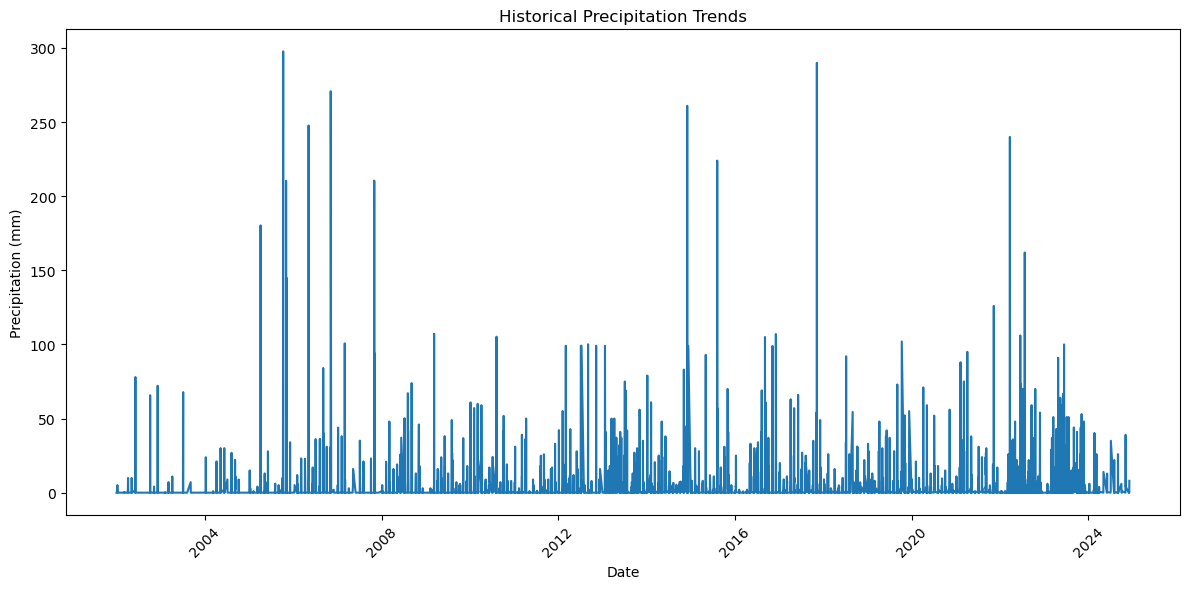

In [6]:
# Plotting historical precipitation trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=history_precipitation, x=history_precipitation.index, y='precip')
plt.title('Historical Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Extract month and year from index
history_precipitation['Month'] = history_precipitation.index.month
history_precipitation['Year'] = history_precipitation.index.year

# Split data into training and test sets (e.g., 80% training, 20% test)
train_size = 0.8
train_index = int(train_size * len(history_precipitation))

train_data = history_precipitation.iloc[:train_index]
test_data = history_precipitation.iloc[train_index:]

# Verify sizes of training and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 3180
Test set size: 796


In [10]:
# Fit ARIMA Model
    model = ARIMA(train_data['precip'], order=(1, 1, 1))
    model_fit = model.fit()
    print("ARIMA model fitted successfully.")
except ValueError as ve:
    print(f"ValueError while fitting ARIMA model: {ve}")
except TypeError as te:
    print(f"TypeError while fitting ARIMA model: {te}")
except Exception as e:
    print(f"Unexpected error while fitting ARIMA model: {e}")

C:\Users\hp\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted successfully.


In [11]:
# Forecasting
    forecast_steps = 30  # Forecast for the next 30 days
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_dates = pd.date_range(start=history_precipitation.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
    forecast_series = pd.Series(forecast, index=forecast_dates)
    print(forecast_series)
except Exception as e:
    print(f"Error during forecasting: {e}")

2024-12-07   NaN
2024-12-08   NaN
2024-12-09   NaN
2024-12-10   NaN
2024-12-11   NaN
2024-12-12   NaN
2024-12-13   NaN
2024-12-14   NaN
2024-12-15   NaN
2024-12-16   NaN
2024-12-17   NaN
2024-12-18   NaN
2024-12-19   NaN
2024-12-20   NaN
2024-12-21   NaN
2024-12-22   NaN
2024-12-23   NaN
2024-12-24   NaN
2024-12-25   NaN
2024-12-26   NaN
2024-12-27   NaN
2024-12-28   NaN
2024-12-29   NaN
2024-12-30   NaN
2024-12-31   NaN
2025-01-01   NaN
2025-01-02   NaN
2025-01-03   NaN
2025-01-04   NaN
2025-01-05   NaN
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\hp\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecast_precip': forecast})
forecast_df.set_index('date', inplace=True)

In [16]:
# Define a threshold for flood risk
threshold = 100  # Example threshold

# Check if forecast precipitation exceeds the threshold
forecast_df['risk_of_flood'] = forecast_df['forecast_precip'] > threshold


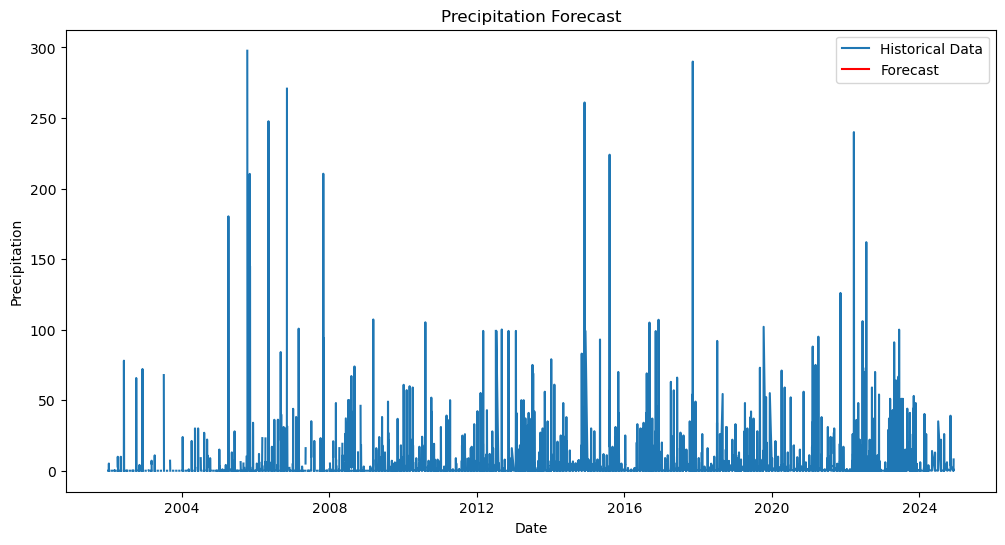

In [12]:
# Plotting the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(history_precipitation.index, history_precipitation['precip'], label='Historical Data')
    plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
    plt.title('Precipitation Forecast')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")

In [17]:
forecast_df['risk_of_flood']

date
2024-12-07    False
2024-12-08    False
2024-12-09    False
2024-12-10    False
2024-12-11    False
2024-12-12    False
2024-12-13    False
2024-12-14    False
2024-12-15    False
2024-12-16    False
2024-12-17    False
2024-12-18    False
2024-12-19    False
2024-12-20    False
2024-12-21    False
2024-12-22    False
2024-12-23    False
2024-12-24    False
2024-12-25    False
2024-12-26    False
2024-12-27    False
2024-12-28    False
2024-12-29    False
2024-12-30    False
2024-12-31    False
2025-01-01    False
2025-01-02    False
2025-01-03    False
2025-01-04    False
2025-01-05    False
Name: risk_of_flood, dtype: bool

In [21]:
# Identify indices where risk_of_flood is predicted as 1
flood_indices = forecast[forecast_df['risk_of_flood'].values].index

# Assuming you want the first occurrence of flood prediction
if len(flood_indices) > 0:
    next_flood_day = flood_indices[0]
    next_flood_day_date = next_flood_day  # If index is datetime, you can convert it to date using .date()
    print(f"Next flood day predicted: {next_flood_day_date}")
else:
    print("No flood predicted in the forecast period.")


No flood predicted in the forecast period.
